<h1 style="text-align: center;">پروژه دوم درس مبانی داده کاوی مقطع کارشناسی</h1>
<h2 style="text-align: center;">پیش بینی بازاریابی بانکی با استفاده از الگوریتم درخت تصمیم</h2>
<h3 style="text-align: center;">Sajjad Manafi *** 994421040</h3>

<h4 style="text-align: right;">:برای اجرای موارد پروژه نیاز به استفاده از یک سری لایبرری داریم</h4>

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

<h3 style="text-align: right;">:اهداف پروژه</h3>
<h4 style="text-align: right;">جمع آوری داده ها</h4>

In [243]:
df = pd.read_csv('./bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [245]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Attribute Information
## Input variables

### Bank client data

1. `age` (numeric)
2. `job` : type of job (categorical)
3. `marital` : marital status (categorical)
4. `education` (categorical)
5. `default`: has credit in default? (categorical)
6. `housing`: has housing loan? (categorical)
7. `loan`: has personal loan? (categorical)

### Related with the last contact of the current campaign

8. `contact`: contact communication type (categorical)
9. `month`: last contact month of year (categorical)
10. `day_of_week`: last contact day of the week (categorical)
11. `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes

12. `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. `previous`: number of contacts performed before this campaign and for this client (numeric)
15. `poutcome`: outcome of the previous marketing campaign (categorical)

### Social and economic context attributes

16. `emp.var.rate`: employment variation rate - quarterly indicator (numeric)
17. `cons.price.idx`: consumer price index - monthly indicator (numeric)
18. `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)
19. `euribor3m`: euribor 3 month rate - daily indicator (numeric)
20. `nr.employed`: number of employees - quarterly indicator (numeric)

## Output variable (desired target)

21. `y` - has the client subscribed a term deposit? (binary: 'yes','no')


<h4 style="text-align: right;">پیش پردازش داده ها</h4>

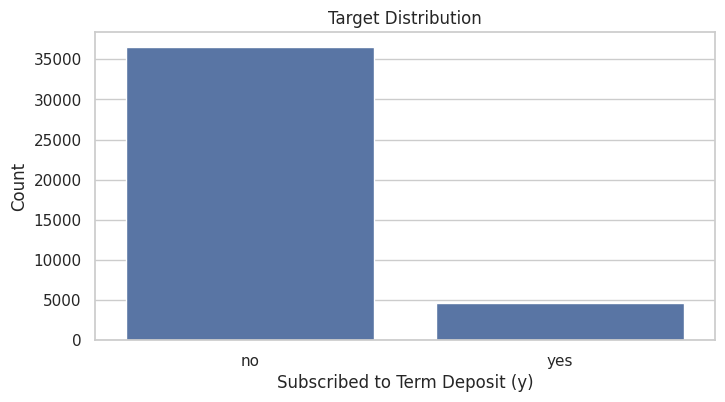

In [246]:
plt.figure(figsize=(8, 4))
sns.countplot(x='y', data=df)
plt.title('Target Distribution')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Count')
plt.show()

In [247]:
df=df[~df.duplicated()] #removing duplicate rows
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<h5 style="text-align: right;">به نظر میرسد مقادیر گمشده ای نداریم</h5>

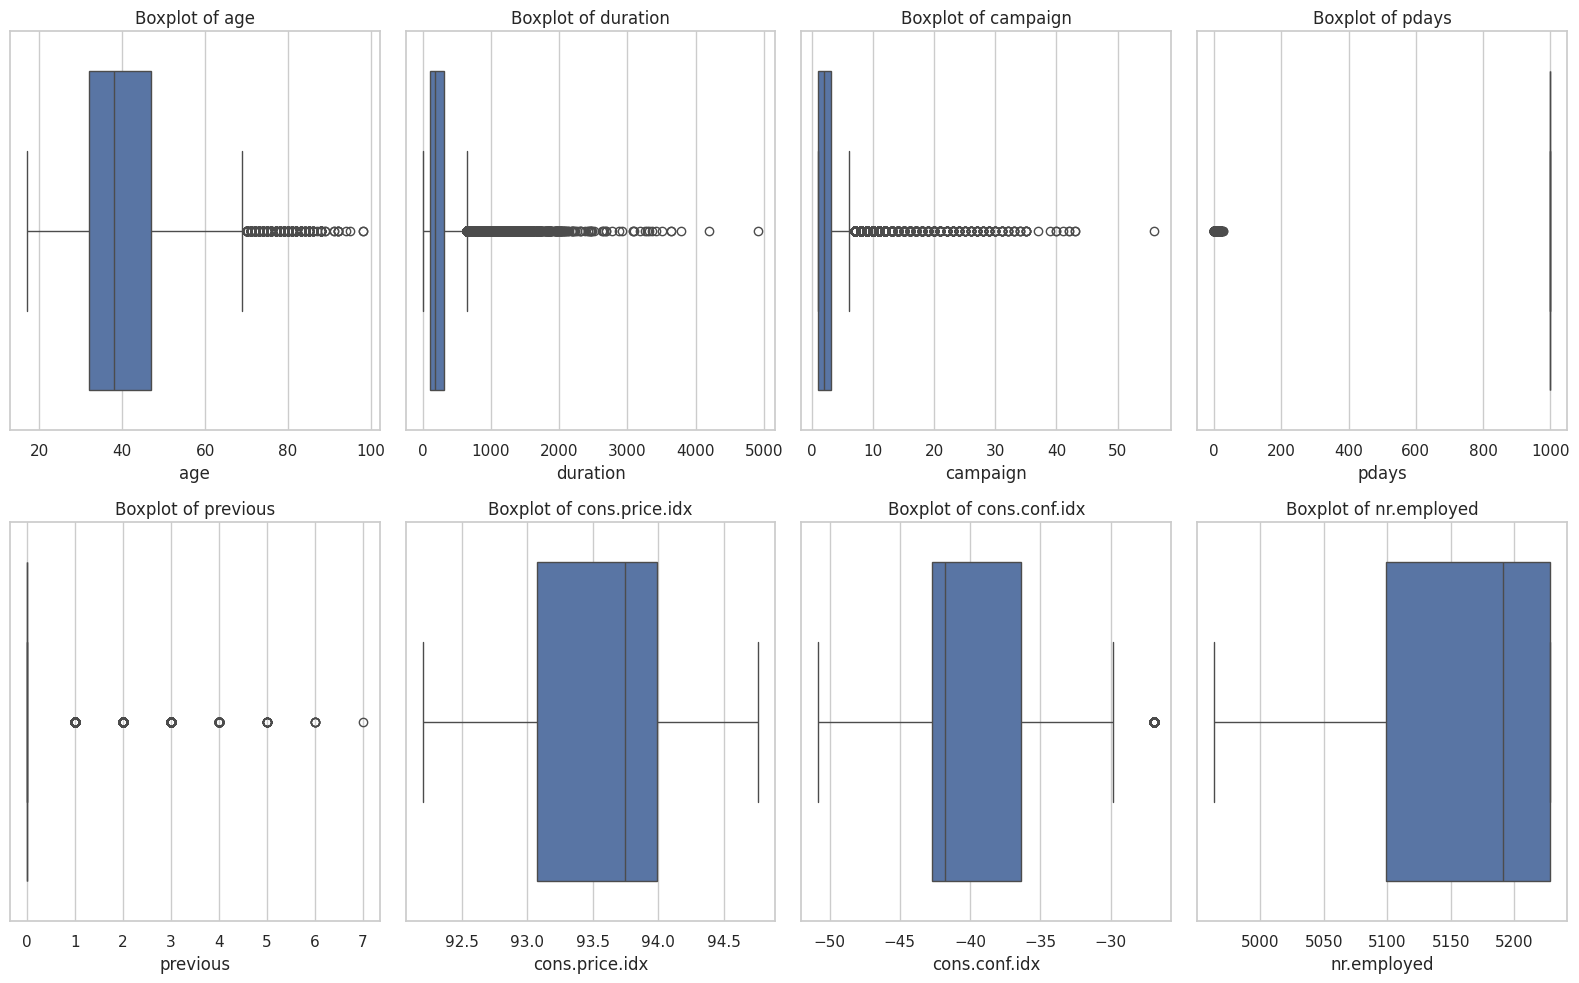

In [248]:
numerical_fields = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                    'cons.price.idx', 'cons.conf.idx', 'nr.employed']

plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

for i, field in enumerate(numerical_fields, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns
    sns.boxplot(x=df[field])
    plt.title(f'Boxplot of {field}')

plt.tight_layout()
plt.show()

In [249]:
# Handling Outliers
numerical_fields_have_outliers = ['age', 'duration', 'campaign', 'cons.conf.idx']
for field in numerical_fields_have_outliers:
    z_scores = np.abs(zscore(df[field]))
    outliers = (z_scores > 2)
    df = df[~outliers]

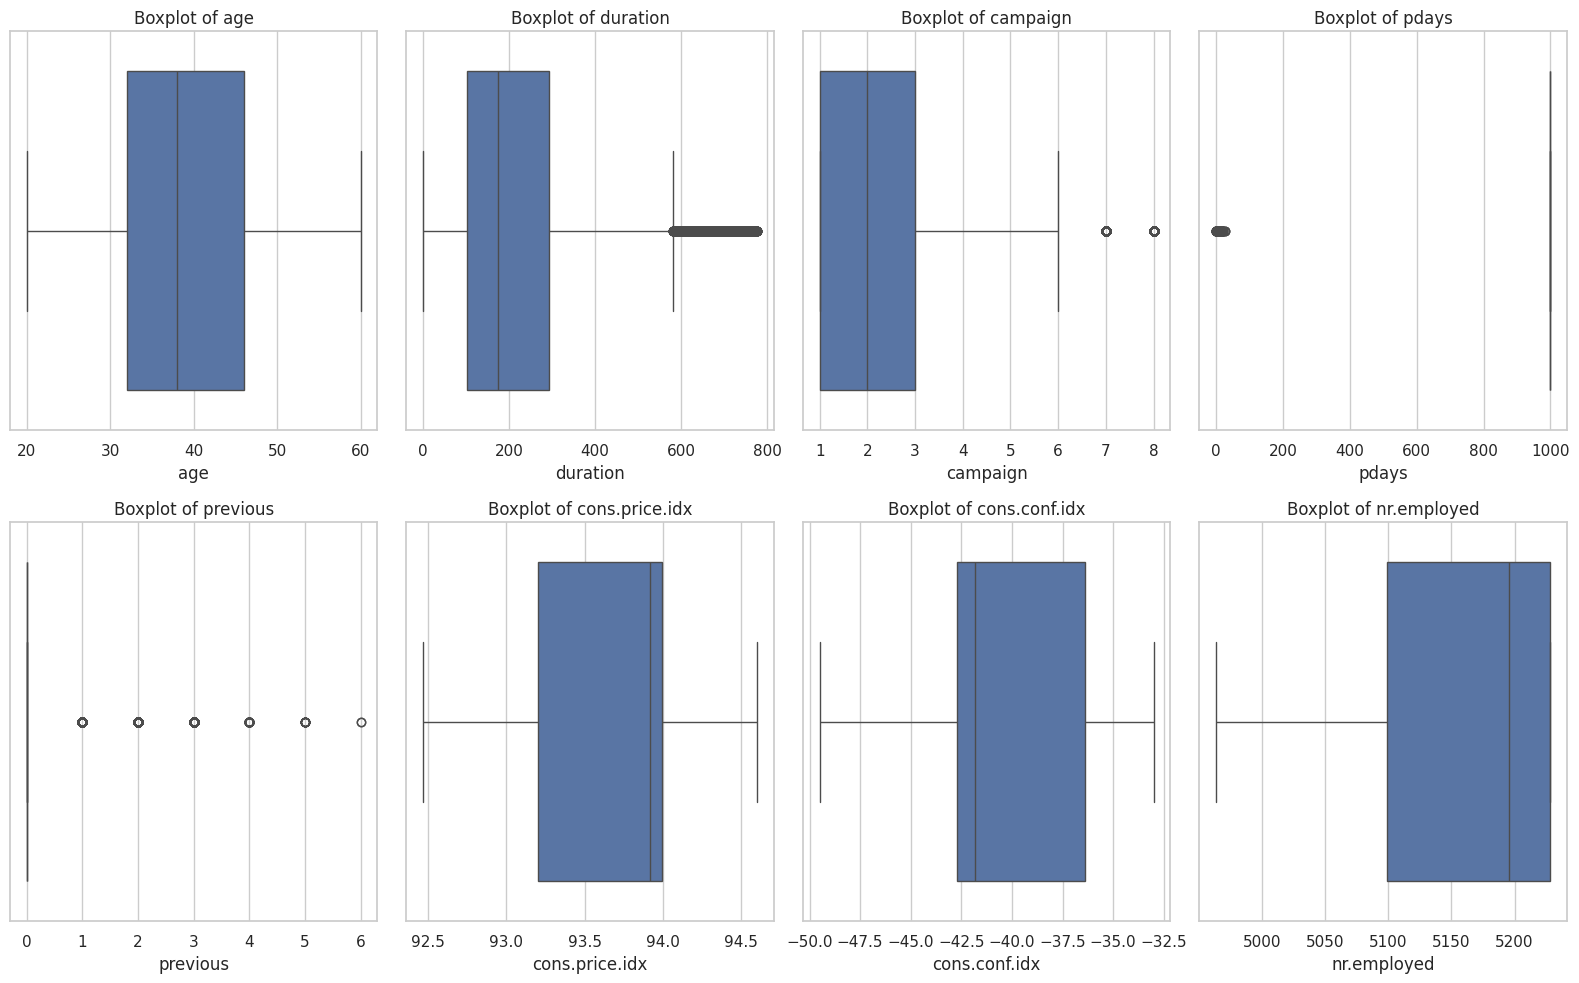

In [250]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid") 

for i, field in enumerate(numerical_fields, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns
    sns.boxplot(x=df[field])
    plt.title(f'Boxplot of {field}')

plt.tight_layout()
plt.show()

<h5 style="text-align: right;">مقادیر پرت از فیلد هایی که مقادیر پرت داشتند پاک شدند</h5>

<h5 style="text-align: right;">باید متغییر های طبقه بندی شده را به متغییر های عددی تبدیل کنیم</h5>

In [251]:
# Replace 999 with -1 in 'pdays' column
df['pdays'] = df['pdays'].replace(999, -1)

<h5 style="text-align: right;">بررسی مقادیر مختلف در ویژگی های طبقه بندی شده</h5>

In [252]:
categorical_columns = df.select_dtypes(include=['object']).columns


for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")

Unique values for 'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values for 'marital': ['married' 'single' 'divorced' 'unknown']
Unique values for 'education': ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values for 'default': ['no' 'unknown' 'yes']
Unique values for 'housing': ['no' 'yes' 'unknown']
Unique values for 'loan': ['no' 'yes' 'unknown']
Unique values for 'contact': ['telephone' 'cellular']
Unique values for 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'apr' 'mar' 'sep']
Unique values for 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']
Unique values for 'poutcome': ['nonexistent' 'failure' 'success']
Unique values for 'y': ['no' 'yes']


In [253]:
# Combine similar jobs into categiroes
df['job'] = df['job'].replace(['management', 'admin.'], 'management')
df['job'] = df['job'].replace(['services','housemaid'], 'services')
df['job'] = df['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [254]:
df['y'].replace({'no': 0, 'yes': 1}, inplace=True)

# Identify and encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

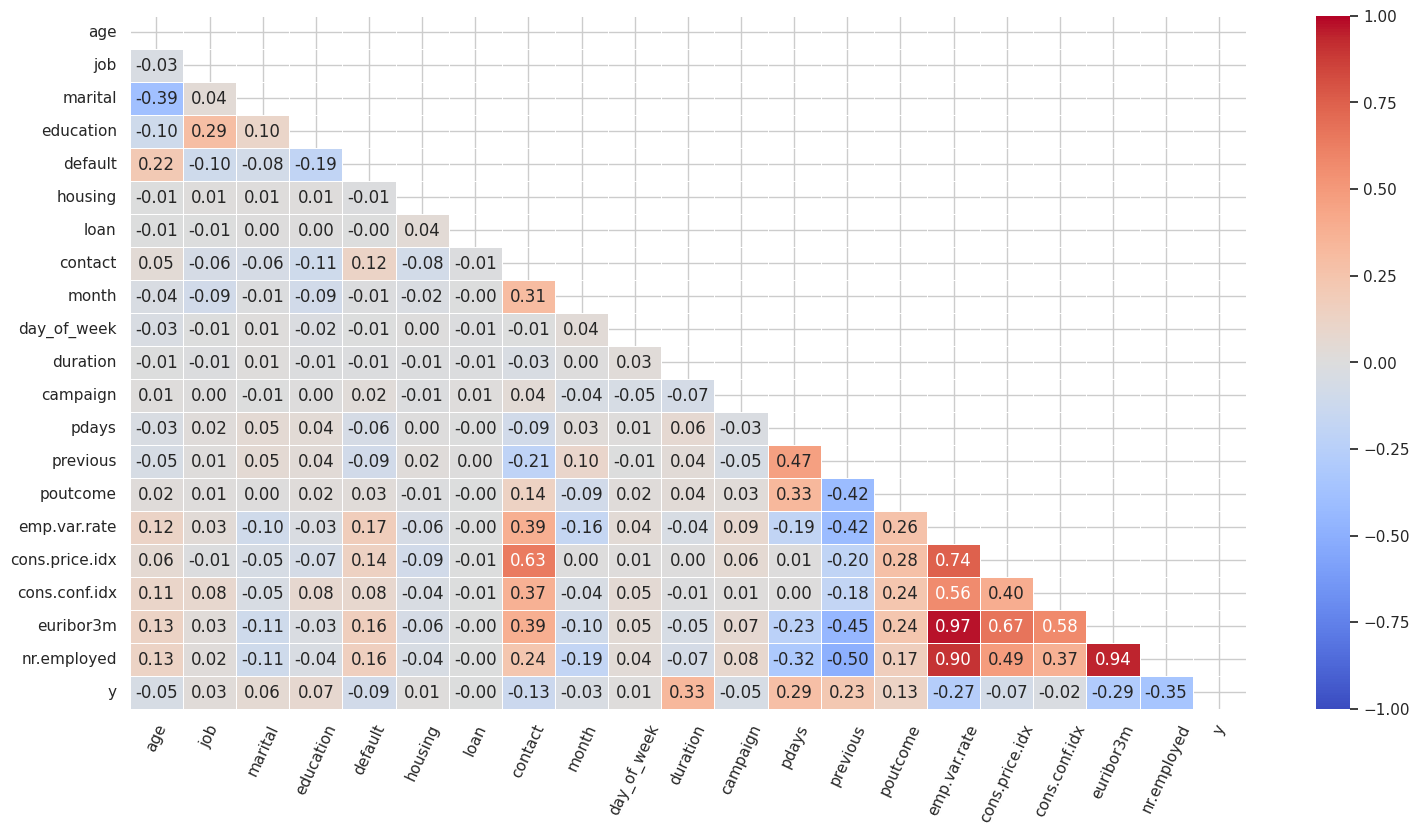

In [255]:
fig, ax = plt.subplots(figsize=(18, 9))

df_corr = df.corr(method='pearson')
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=df_corr, vmin=-1, vmax=1, mask=mask, 
            cmap=sns.color_palette('coolwarm', as_cmap=True),
            annot=True, fmt='.2f', linewidths=.5, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=65);

<h5 style="text-align: right;">بر اساس این نمودار میتوان برخی از ویژگی هایی که تاثیر چندانی در نتیجه گیری مدل ندارد را پاک کرد</h5>

In [256]:
df = df.drop(["contact", 'emp.var.rate', "euribor3m", "nr.employed"], axis = 1)

<h5 style="text-align: right;">حالا مجموعه داده را به دسته های آموزشی و آزمایشی تقسیم میکنیم</h5>

In [257]:
Data_X = df.drop('y', axis=1)
Data_y = df['y']

X_trainset, X_testset, y_trainset, y_testset = train_test_split(Data_X, Data_y, test_size=0.2, random_state=4)

<h4 style="text-align: right;">اجرای درخت تصمیم</h4>

In [258]:
marketingTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7, min_samples_leaf=5)

<h4 style="text-align: right;">آموزش مدل</h4>

In [259]:
marketingTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5)

<h4 style="text-align: right;">ارزیابی مدل</h4>

In [260]:
yhat = marketingTree.predict(X_testset)

In [261]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, yhat))

DecisionTrees's Accuracy:  0.946168012466355


In [262]:
print(classification_report(y_testset, yhat))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6586
           1       0.66      0.40      0.50       473

    accuracy                           0.95      7059
   macro avg       0.81      0.69      0.74      7059
weighted avg       0.94      0.95      0.94      7059



<h5 style="text-align: right;">دقت، صحت، بازیابی و امتیاز اف-۱</h5>

Confusion Matrix:
[[6489   97]
 [ 283  190]]


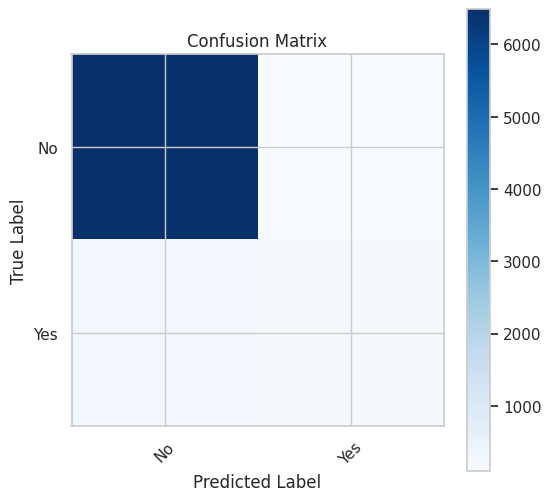

In [263]:
# Confusion Matrix
cm = confusion_matrix(y_testset, yhat)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['No', 'Yes']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

<h5 style="text-align: right;">ماتریس درهم ریختگی</h5>

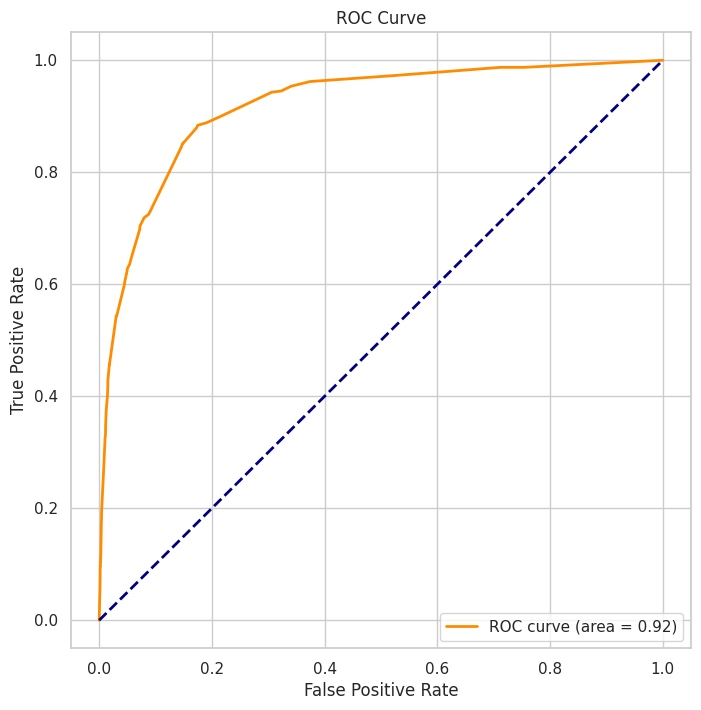

In [264]:
# Get ROC curve
fpr, tpr, thresholds = roc_curve(y_testset, marketingTree.predict_proba(X_testset)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

<h4 style="text-align: right;">تجزیه و تحلیل اهمیت ویژگی</h4>

<h5 style="text-align: right;">AUC نمودار</h5>

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35291 entries, 0 to 41059
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35291 non-null  int64  
 1   job             35291 non-null  int64  
 2   marital         35291 non-null  int64  
 3   education       35291 non-null  int64  
 4   default         35291 non-null  int64  
 5   housing         35291 non-null  int64  
 6   loan            35291 non-null  int64  
 7   month           35291 non-null  int64  
 8   day_of_week     35291 non-null  int64  
 9   duration        35291 non-null  int64  
 10  campaign        35291 non-null  int64  
 11  pdays           35291 non-null  int64  
 12  previous        35291 non-null  int64  
 13  poutcome        35291 non-null  int64  
 14  cons.price.idx  35291 non-null  float64
 15  cons.conf.idx   35291 non-null  float64
 16  y               35291 non-null  int64  
dtypes: float64(2), int64(15)
memory usag

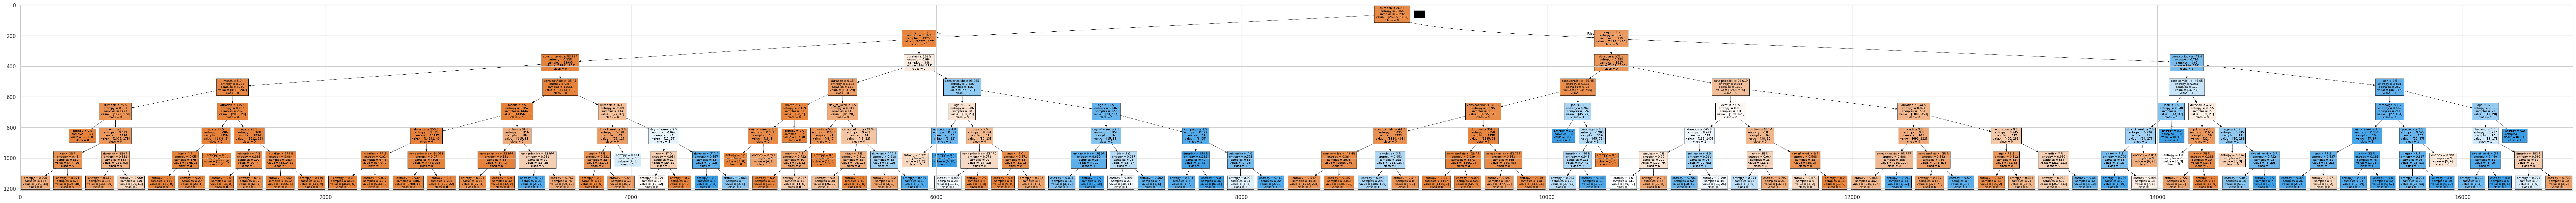

In [266]:
dot_data = StringIO()
filename = "BankMarketing.png"
featureNames = df.columns[0:16]
class_names_str = list(map(str, np.unique(y_trainset)))  # Convert class names to strings
out = tree.export_graphviz(
    marketingTree,
    feature_names=featureNames,
    out_file=dot_data,
    class_names=class_names_str,
    filled=True,
    special_characters=True,
    rotate=False
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')

<h5 style="text-align: right;">طبق نمودار، ریشه های درخت به ترتیب از بالا بیشترین اهمیت را در پیش بینی دارند</h5>

<h4 style="text-align: right;">تنظیم فراپارامتر</h4>

In [267]:
dt_model = DecisionTreeClassifier()

# multiple hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 5, 10, 20]
}

# Create the grid search object
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_trainset, y_trainset)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_dt_model.predict(X_testset)
accuracy = metrics.accuracy_score(y_testset, y_pred)
print("Accuracy of the Best Model:", accuracy)

Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 5}
Accuracy of the Best Model: 0.9431930868394957


<h5 style="text-align: right;">در این قسمت، دیتاست به ۵ بخش تقسیم میشود و ۵ بار ترین میشود، هر بار با ترکیب های مختلفی، ۴ تا برای ترین و یکی برای تست تا بهترین فراپارامتر ها انتخاب شوند</h5>